#### Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno
from statsmodels.graphics.mosaicplot import mosaic

from ycimpute.imputer import knnimput
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from imblearn.over_sampling import SMOTE
from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')

#### Importing and Close Overview of Data

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [3]:
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [4]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.0,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.0,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.0,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.0,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.0,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.0,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.0,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.0,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


In [6]:
df.shape

(10000, 21)

In [7]:
df['Gender'].value_counts()

Gender
Male      5003
Female    4978
Name: count, dtype: int64

In [8]:
df['Smoking'].value_counts()

Smoking
Yes    5123
No     4852
Name: count, dtype: int64

In [9]:
df['Family Heart Disease'].value_counts()

Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

In [10]:
df['Stress Level'].value_counts()

Stress Level
Medium    3387
Low       3320
High      3271
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [12]:
df.isnull().sum().sum()

3054

<Axes: >

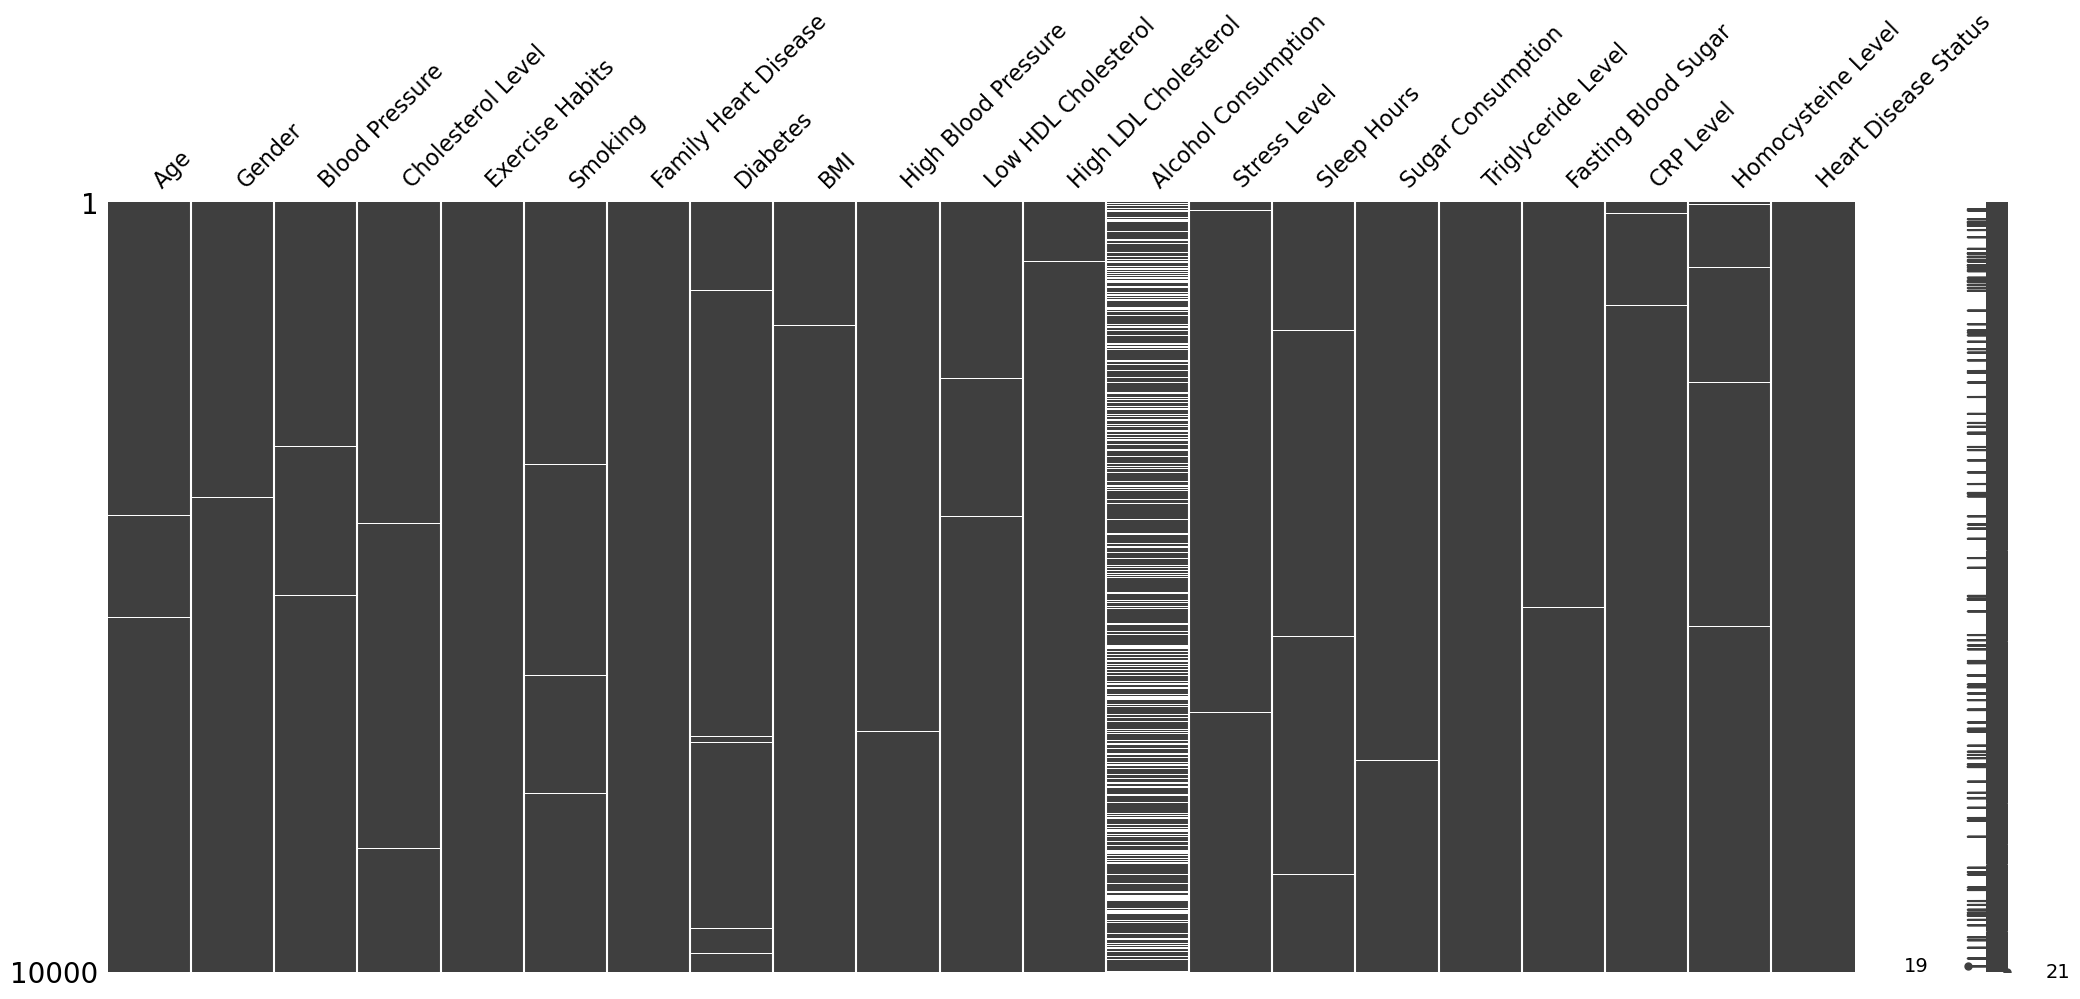

In [13]:
msno.matrix(df)

<Axes: >

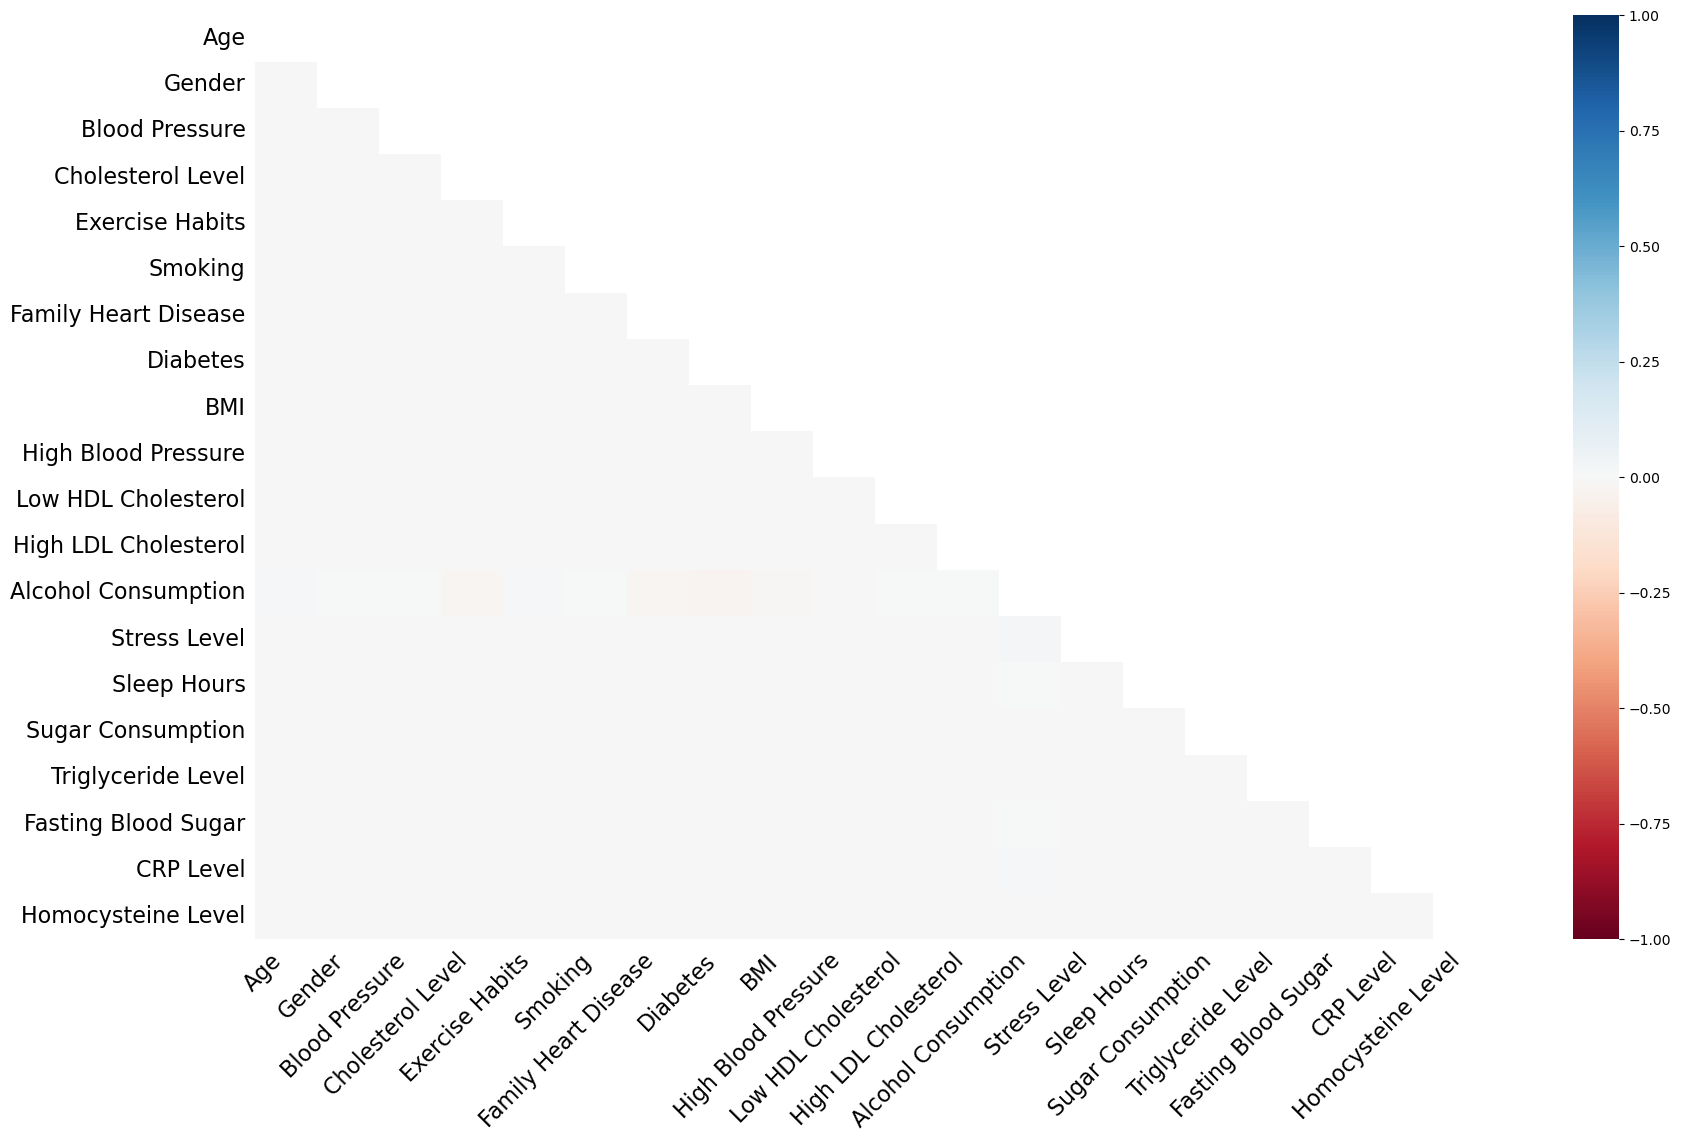

In [14]:
msno.heatmap(df)

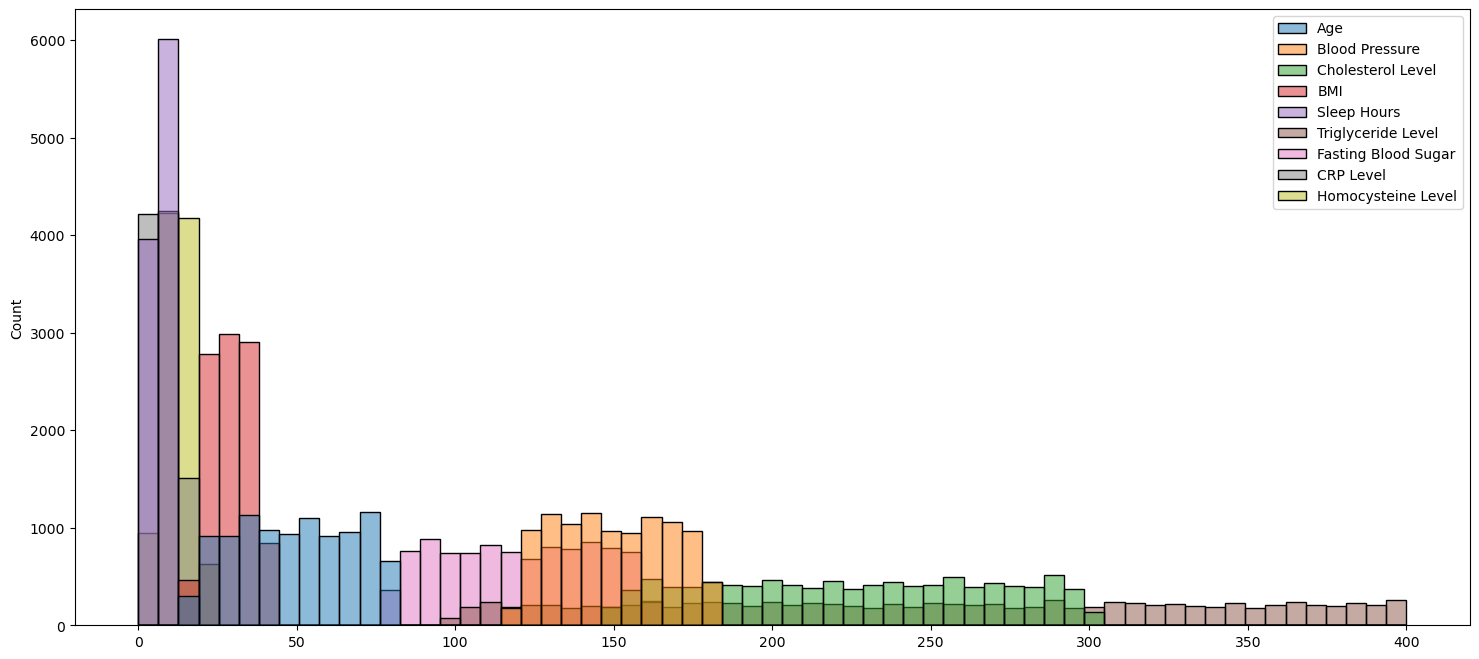

In [15]:
plt.figure(figsize=(18,8))
sns.histplot(df)
plt.show()

#### Exploratry Data Analysis

In [16]:
cat_df = df.select_dtypes(include=['object'])
cat_df.nunique()

Gender                  2
Exercise Habits         3
Smoking                 2
Family Heart Disease    2
Diabetes                2
High Blood Pressure     2
Low HDL Cholesterol     2
High LDL Cholesterol    2
Alcohol Consumption     3
Stress Level            3
Sugar Consumption       3
Heart Disease Status    2
dtype: int64

In [17]:
for col in cat_df.columns:
    print(f"Column: {col}")
    print(cat_df[col].value_counts(), end = "\n\n")

Column: Gender
Gender
Male      5003
Female    4978
Name: count, dtype: int64

Column: Exercise Habits
Exercise Habits
High      3372
Medium    3332
Low       3271
Name: count, dtype: int64

Column: Smoking
Smoking
Yes    5123
No     4852
Name: count, dtype: int64

Column: Family Heart Disease
Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

Column: Diabetes
Diabetes
No     5018
Yes    4952
Name: count, dtype: int64

Column: High Blood Pressure
High Blood Pressure
Yes    5022
No     4952
Name: count, dtype: int64

Column: Low HDL Cholesterol
Low HDL Cholesterol
Yes    5000
No     4975
Name: count, dtype: int64

Column: High LDL Cholesterol
High LDL Cholesterol
No     5036
Yes    4938
Name: count, dtype: int64

Column: Alcohol Consumption
Alcohol Consumption
Medium    2500
Low       2488
High      2426
Name: count, dtype: int64

Column: Stress Level
Stress Level
Medium    3387
Low       3320
High      3271
Name: count, dtype: int64

Column: Sugar Consumption
Sugar

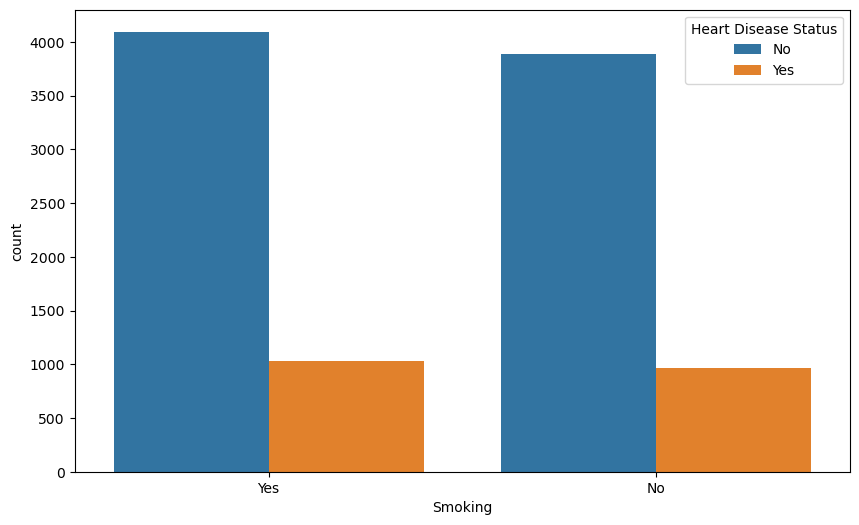

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Smoking', hue = 'Heart Disease Status',)
plt.show()

In [19]:
smoking_heart_disease = df.groupby("Smoking")['Heart Disease Status'].value_counts(normalize=True)
print(smoking_heart_disease)

Smoking  Heart Disease Status
No       No                      0.801113
         Yes                     0.198887
Yes      No                      0.799141
         Yes                     0.200859
Name: proportion, dtype: float64


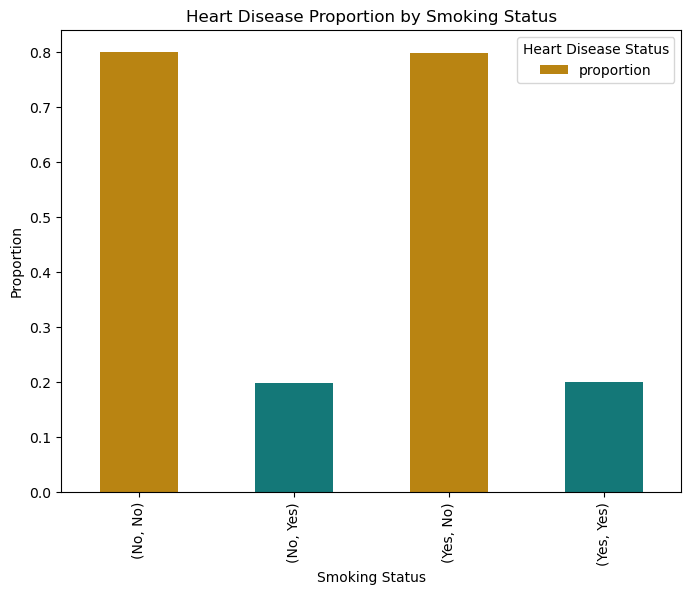

In [20]:
smoking_heart_disease.plot(kind = 'bar', stacked= False, figsize=(8,6), color = ['#B98412', '#147878'])
plt.title('Heart Disease Proportion by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion')
plt.legend(title='Heart Disease Status')
plt.show()

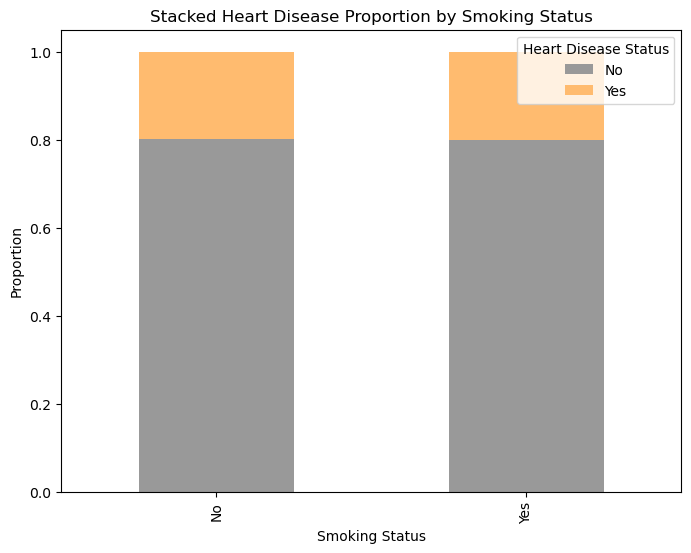

In [21]:
smoking_heart_disease = df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True).unstack()

smoking_heart_disease.plot(kind="bar", stacked=True, figsize=(8,6), color=["#999999","#ffbb6f"])

plt.title("Stacked Heart Disease Proportion by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease Status")
plt.show()

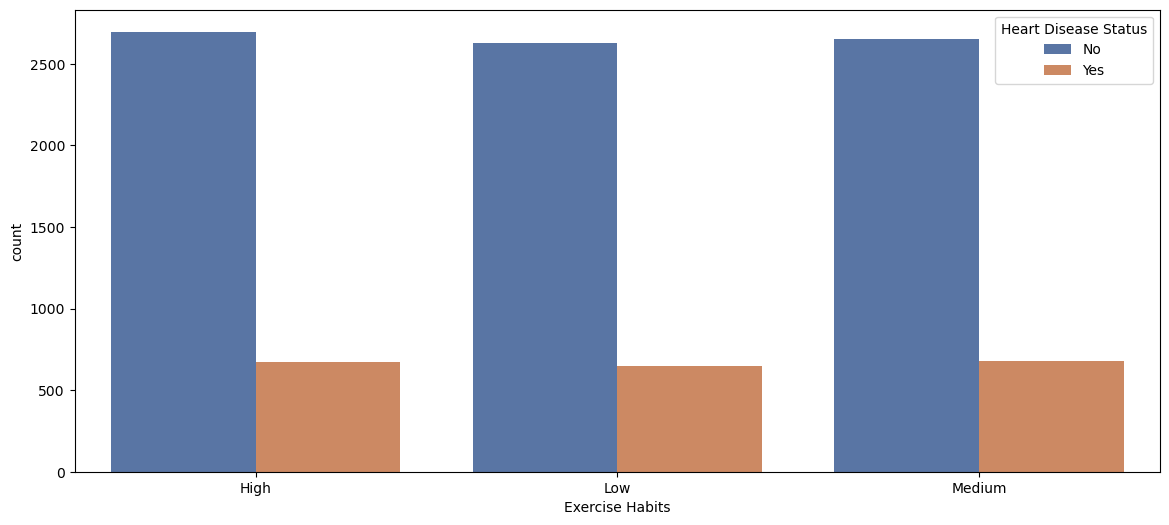

In [22]:
plt.figure(figsize=(14,6))
sns.countplot(data = df, x='Exercise Habits', hue='Heart Disease Status', palette='deep')
plt.show()

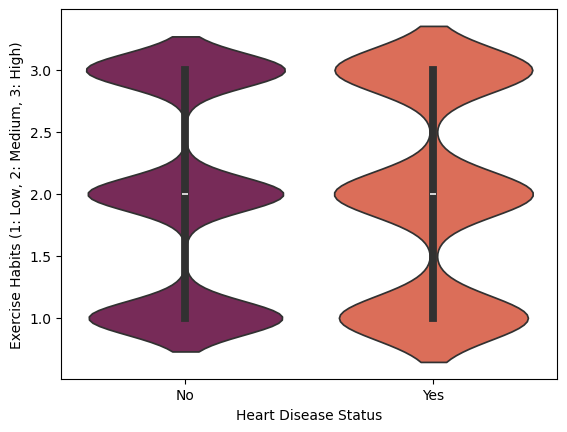

In [24]:
exercise_mapping = {'Low':1, "Medium":2,"High":3}
df['Exercise Habits Numeric'] = df['Exercise Habits'].map(exercise_mapping)
sns.violinplot(data = df, x = 'Heart Disease Status', y = 'Exercise Habits Numeric', palette='rocket')
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel('Exercise Habits (1: Low, 2: Medium, 3: High)')
plt.show()

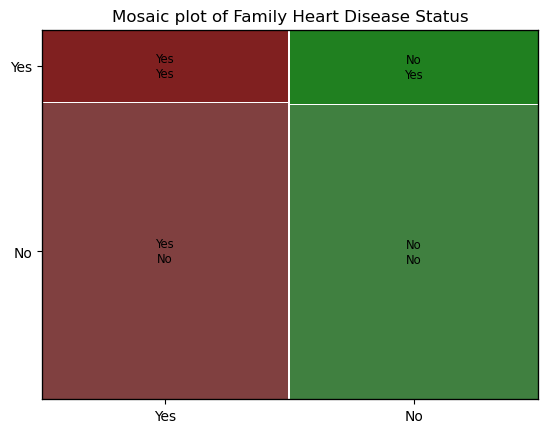

In [25]:
mosaic(data = df, index=['Family Heart Disease', 'Heart Disease Status'])
plt.title('Mosaic plot of Family Heart Disease Status')
plt.show()